In [1]:
import enviroment
import pacman
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

from ghost_avoidance_heuristic import GhostAvoidanceHeuristic
# Needed to hide warnings in the matplotlib sections
import warnings
import numpy as np
warnings.filterwarnings("ignore")

In [2]:
maze_arqs = {'Mazes/TinyMaze01.txt':[30,28],
             'Mazes/SmallMaze01.txt':[30,84],
             'Mazes/SmallMaze02.txt':[30,56],
             'Mazes/MediumMaze01.txt':[60,56],
             'Mazes/MediumMaze02.txt':[60,112],
             'Mazes/BigMaze01.txt':[60,140],
             'Mazes/BigMaze02.txt':[90,140],
             'maze-test.txt':[28,28]}

In [3]:
maze_name = 'Mazes/TinyMaze01.txt'
maze, initial_position, goal_position = enviroment.getMazeTest(maze_name, maze_arqs[maze_name][0], maze_arqs[maze_name][1])
print("Initial position: " + str(initial_position))
print("Goal position: " + str(goal_position))

Initial position: (3, 4)
Goal position: (24, 21)


In [4]:
def get_solution_info(node, expanded_nodes, food_nodes):
    print("Number of expanded nodes:")
    print(expanded_nodes)
    print("Number of expanded food nodes:")
    print(food_nodes)
    food_nodes_path = 0
    for n in node.path():
        food_nodes_path += problem.check_food(n.state)
    print("Number of nodes in the path:")
    print(len(node.path()))
    print("Number of food nodes in the path:")
    print(food_nodes_path)
    
    print("------------------------------------------------")
    
    print(node.solution())
    print("Path:")
    print(node.path())

In [5]:
def make_grid_plot(maze, initial_position, goal_position):
    grid, food_x, food_y = maze.get_int_grid(initial_position, goal_position)

    fig, ax = plt.subplots(figsize=(10, 10))
    cmap = colors.ListedColormap(['yellow', 'red', 'darkblue','gray','black'])

    im = ax.imshow(grid, cmap=cmap)
    ax = plt.gca()

    ax.set_xticks(np.arange(len(grid)))
    ax.set_yticks(np.arange(len(grid[0])))
    ax.set_xticklabels(np.arange(0, len(grid), 1))
    ax.set_yticklabels(np.arange(0, len(grid[0]), 1))

    ax.set_xticks(np.arange(-.5, len(grid)-1, 1), minor=True);
    ax.set_yticks(np.arange(-.5, len(grid)-1, 1), minor=True);
    ax.grid(which='minor', color='black', linestyle='-', linewidth=2)


    ax.scatter(food_y, food_x, color = 'white', zorder=10)
    ax.scatter(initial_position[1], initial_position[0], marker='o', color='white',s=110)
    ax.scatter(goal_position[1], goal_position[0], marker='X', color='white', s=90)

    plt.show()

In [6]:
def make_path_plot(maze, initial_position, goal_position, node):    
    fig, ax = plt.subplots(figsize=(10, 10))
    cmap = colors.ListedColormap(['yellow', 'red', 'purple', 'black'])

    grid, food_x, food_y = maze.get_final_grid(initial_position, goal_position, [n.state for n in node.path()])

    im = ax.imshow(grid, cmap=cmap)
    ax = plt.gca()

    ax.set_xticks(np.arange(len(grid)))
    ax.set_yticks(np.arange(len(grid[0])))
    ax.set_xticklabels(np.arange(0, len(grid), 1))
    ax.set_yticklabels(np.arange(0, len(grid[0]), 1))

    ax.set_xticks(np.arange(-.5, len(grid)-1, 1), minor=True);
    ax.set_yticks(np.arange(-.5, len(grid)-1, 1), minor=True);
    ax.grid(which='minor', color='black', linestyle='-', linewidth=2)


    ax.scatter(food_y, food_x, color = 'white', zorder=10)
    ax.scatter(initial_position[1], initial_position[0], marker='o', color='white',s=110)
    ax.scatter(goal_position[1], goal_position[0], marker='X', color='white', s=90)

    plt.show()

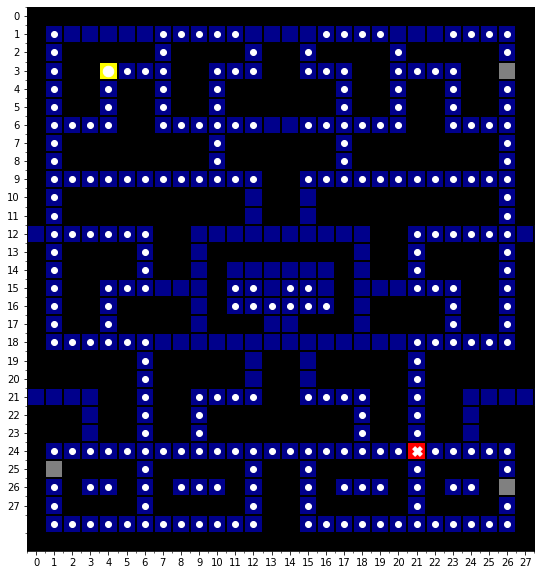

In [7]:
make_grid_plot(maze, initial_position, goal_position)

In [8]:
problem = pacman.Problem(maze, initial_position, goal_position)

# Breadth First Search - BFS

Number of expanded nodes:
231
Number of expanded food nodes:
171
Number of nodes in the path:
33
Number of food nodes in the path:
29
------------------------------------------------
[<Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>]
Path:
[<Node (3, 4)>, <Node (4, 4)>, <Node (5, 4)>, <Node (6, 4)>, <Node (6, 3)

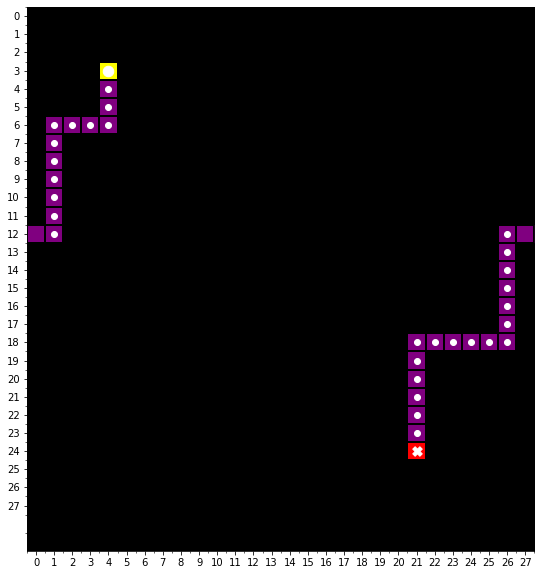

In [14]:
solution_node, expanded_nodes, food_nodes = pacman.breadth_first_graph_search(problem)
get_solution_info(solution_node, expanded_nodes, food_nodes)
make_path_plot(maze, initial_position, goal_position, solution_node)

# Depth First Search - DFS

Number of expanded nodes:
205
Number of expanded food nodes:
138
Number of nodes in the path:
111
Number of food nodes in the path:
62
------------------------------------------------
[<Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.LEFT: (0, -1)>

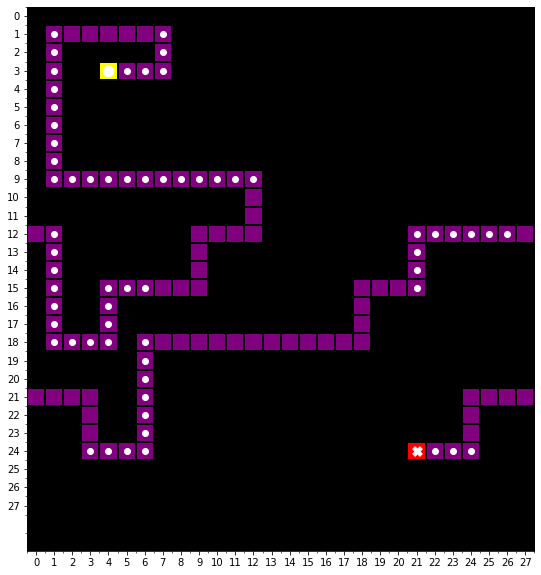

In [15]:
solution_node, expanded_nodes, food_nodes = pacman.depth_first_graph_search(problem)
get_solution_info(solution_node, expanded_nodes, food_nodes)
make_path_plot(maze, initial_position, goal_position, solution_node)

# Greedy Search - Manhattan Distance

Number of expanded nodes:
60
Number of expanded food nodes:
55
Number of nodes in the path:
53
Number of food nodes in the path:
49
------------------------------------------------
[<Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -

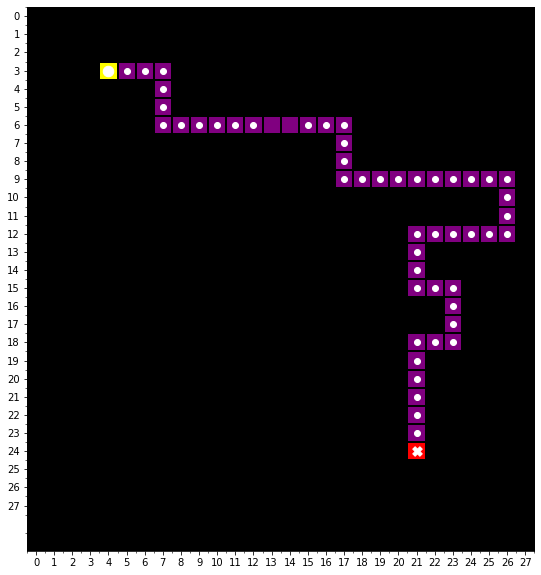

In [16]:
solution_node, expanded_nodes, food_nodes = pacman.greedy_best_first_search(problem)
get_solution_info(solution_node, expanded_nodes, food_nodes)
make_path_plot(maze, initial_position, goal_position, solution_node)

# Greedy Search - Ghost Avoidance Heuristic with Euclidean Distance

In [17]:
problem_ghost = GhostAvoidanceHeuristic(maze, initial_position, goal_position, ghost_proximity_cost=1000)

Number of expanded nodes:
267
Number of expanded food nodes:
196
Number of nodes in the path:
45
Number of food nodes in the path:
23
------------------------------------------------
[<Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 

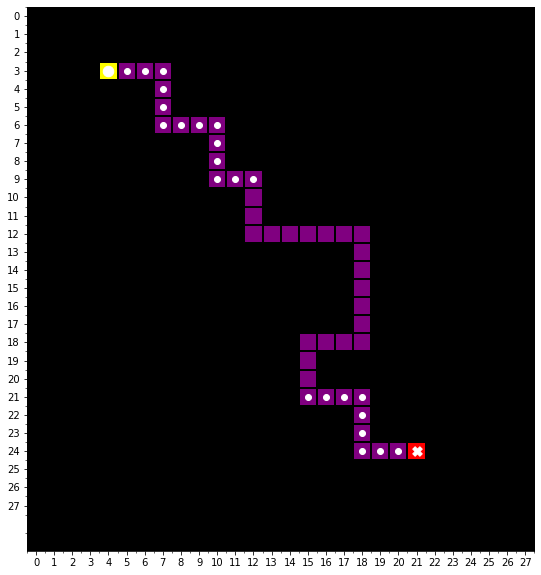

In [18]:
solution_node, expanded_nodes, food_nodes = pacman.greedy_best_first_search(problem, problem_ghost.h)
get_solution_info(solution_node, expanded_nodes, food_nodes)
make_path_plot(maze, initial_position, goal_position, solution_node)

# A* Search - Manhattan Distance

Number of expanded nodes:
61
Number of expanded food nodes:
39
Number of nodes in the path:
39
Number of food nodes in the path:
20
------------------------------------------------
[<Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)

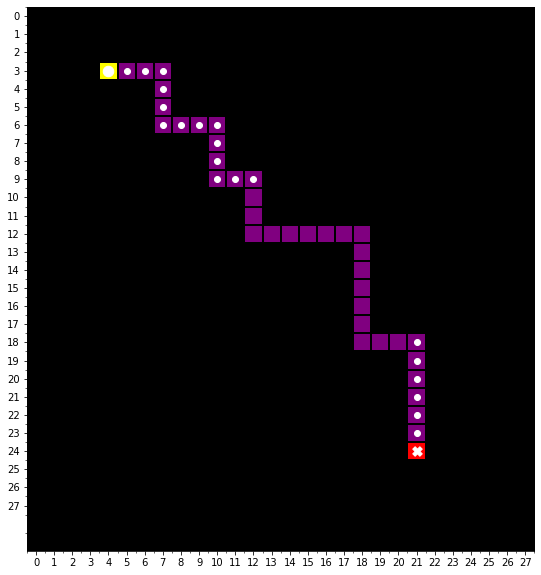

In [19]:
solution_node, expanded_nodes, food_nodes = pacman.a_star_best_first_search(problem)
get_solution_info(solution_node, expanded_nodes, food_nodes)
make_path_plot(maze, initial_position, goal_position, solution_node)

# A* Search - Ghost Avoidance Heuristic with Euclidean Distance

In [15]:
problem_ghost = GhostAvoidanceHeuristic(maze, initial_position, goal_position, ghost_proximity_cost=1000)

Number of expanded nodes:
270
Number of expanded food nodes:
199
Number of nodes in the path:
39
Number of food nodes in the path:
20
------------------------------------------------
[<Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 

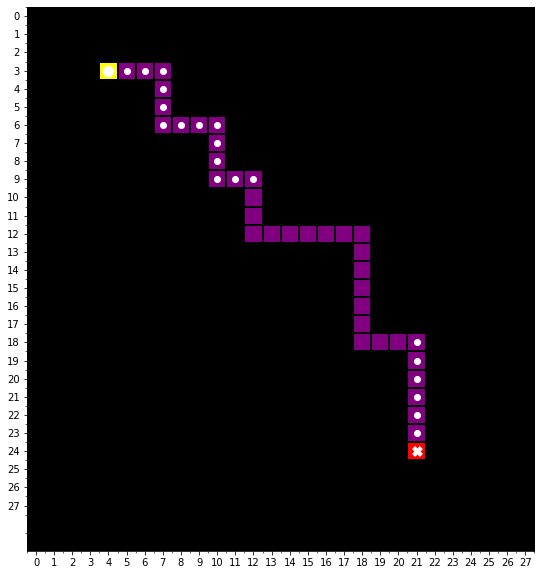

In [16]:
node_solution, expanded_nodes, food_nodes = pacman.a_star_best_first_search(problem, problem_ghost.h)
get_solution_info(solution_node, expanded_nodes, food_nodes)
make_path_plot(maze, initial_position, goal_position, solution_node)

# Hill Climbing Search - Manhattan Distance

<function memoize.<locals>.memoized_fn at 0x7f12297bc950>
38
	 37
	 37
37
	 36
	 38
36
	 35
	 37
35
	 34
	 36
	 36
34
	 33
	 35
33
	 32
	 34
32
	 33
	 31
31
	 30
	 32
30
	 29
	 31
29
	 28
	 30
	 28
	 30
28
	 27
	 29
27
	 26
	 28
26
	 25
	 27
25
	 24
	 26
24
	 23
	 25
23
	 22
	 24
22
	 21
	 23
	 21
	 23
21
	 20
	 22
20
	 19
	 21
19
	 20
	 20
<Node (6, 20)> 20 17
Number of expanded nodes:
20
Number of expanded food nodes:
17
Number of nodes in the path:
20
Number of food nodes in the path:
17
------------------------------------------------
[<Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGH

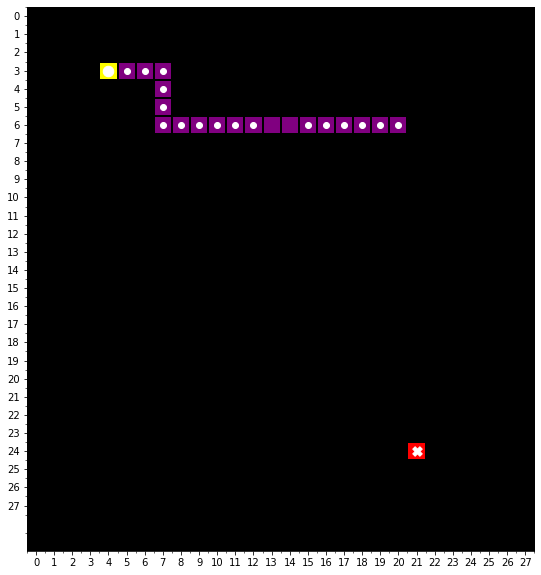

In [9]:
solution_node, expanded_nodes, food_nodes = pacman.hill_climbing_search(problem)
print(solution_node, expanded_nodes, food_nodes)
get_solution_info(solution_node, expanded_nodes, food_nodes)
make_path_plot(maze, initial_position, goal_position, solution_node)

# Hill Climbing Search - Ghost Avoidance Heuristic with Euclidean Distance

<function memoize.<locals>.memoized_fn at 0x7f1221c980d0>
27.018512172212592
	 26.248809496813376
	 26.40075756488817
26.248809496813376
	 25.495097567963924
	 27.018512172212592
25.495097567963924
	 24.758836806279895
	 26.248809496813376
24.758836806279895
	 25.495097567963924
	 25.45584412271571
<Node (6, 4)> 4 3
Number of expanded nodes:
4
Number of expanded food nodes:
3
Number of nodes in the path:
4
Number of food nodes in the path:
3
------------------------------------------------
[<Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>]
Path:
[<Node (3, 4)>, <Node (4, 4)>, <Node (5, 4)>, <Node (6, 4)>]


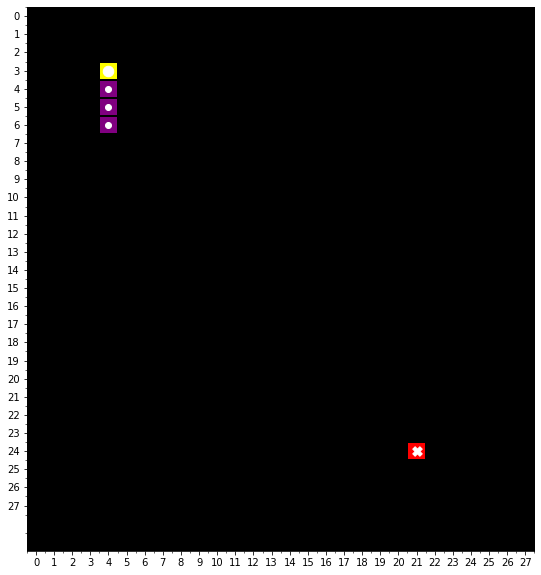

In [11]:
problem_ghost = GhostAvoidanceHeuristic(maze, initial_position, goal_position, ghost_proximity_cost=1000)
solution_node, expanded_nodes, food_nodes = pacman.hill_climbing_search(problem, problem_ghost.h)
get_solution_info(solution_node, expanded_nodes, food_nodes)
make_path_plot(maze, initial_position, goal_position, solution_node)